In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'purchase_data.json'
purchase_data_df = pd.read_json(path)
purchase_data_df.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [3]:
num_players = len(purchase_data_df['SN'].unique())
num_players

573

In [4]:
unique_items = len(purchase_data_df['Item ID'].unique())
unique_items

183

In [5]:
avg_purchase_price = round(purchase_data_df['Price'].mean(), 2)
avg_purchase_price

2.93

In [6]:
num_purchases = purchase_data_df['Price'].size
num_purchases

780

In [7]:
tot_revenue = purchase_data_df['Price'].sum()
tot_revenue

2286.33

# Gender Demographics:


## What I need to know:

1. percentage and count of Male
2. percentage and count of Female
3. percentage and count of other / Non-Disclosed

## what I know:

1. there are more than one representation of some but not all players. the max representation is 5 times.
2. Collumn Gender contains the information needed however it has duplicates.
3. there are 573 unique players.
4. there are 780 rows in the dataframe.

## what I need to do:

1. drop the rows with duplicate players.
2. make new dataframe
3. groupby Gender
4. count gender groups
5. divide counts by total number of players to get percentages.

In [8]:
dropped_duplicate_SN = purchase_data_df.drop_duplicates(subset='SN',keep='first')
gender_grouped_df = dropped_duplicate_SN.groupby('Gender').count()
gender_renamed = gender_grouped_df.rename(index=str, columns={'Age': 'Gender Count', 'Item ID': 'Gender Percentage'})
gender_renamed['Gender Percentage'] = round((gender_renamed.loc[:,'Gender Percentage'] / num_players) * 100, 2)
gender_count = gender_renamed.loc[:, ['Gender Count', 'Gender Percentage']]
gender_count

,Gender Count,Gender Percentage
Gender,,
Female,100,17.45
Male,465,81.15
Other / Non-Disclosed,8,1.40


# Gender Count:

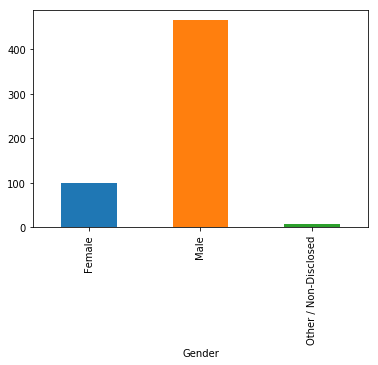

In [43]:
gender_count['Gender Count'].plot.bar()

# Gender Percentages

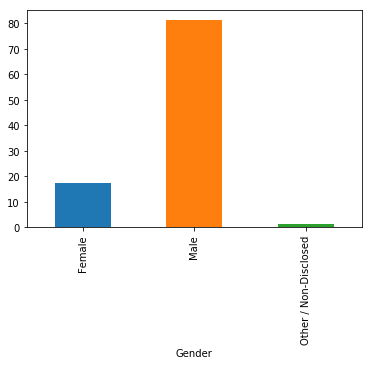

In [44]:
gender_count['Gender Percentage'].plot.bar()

In [9]:
gender_groupby = purchase_data_df.groupby('Gender')

# Purchase Count by Gender:

In [10]:
count_df = gender_groupby.count()
count = count_df.loc[:,'Age']
purchase_count_df = count.to_frame()
purchase_count_df = purchase_count_df.rename(index=str, columns={'Age': 'Purchase Count'})
purchase_count_df
#purchase_count_df = count_df(index=str, columns={'Age': 'Purchase Count'})

,Purchase Count
Gender,
Female,136
Male,633
Other / Non-Disclosed,11


# Average Price by Gender:

In [11]:
avg_df = gender_groupby.mean()
avg = avg_df.loc[:,'Price']
avg_price_df = avg.to_frame()
avg_price_df = avg_price_df.rename(index=str, columns={'Price': 'Avg Purchase Price'})
avg_price_df

,Avg Purchase Price
Gender,
Female,2.815515
Male,2.950521
Other / Non-Disclosed,3.249091


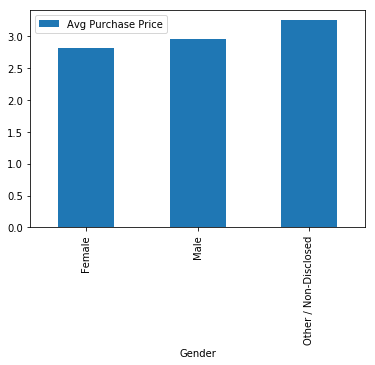

In [39]:
avg_price_df.plot.bar()

# Total Purchase Value by Gender:

In [12]:
total_df = gender_groupby.sum()
total = total_df.loc[:,'Price']
total_price_df = total.to_frame()
total_price_df = total_price_df.rename(index=str, columns={'Price': 'Total Purchase Value'})
total_price_df

,Total Purchase Value
Gender,
Female,382.91
Male,1867.68
Other / Non-Disclosed,35.74


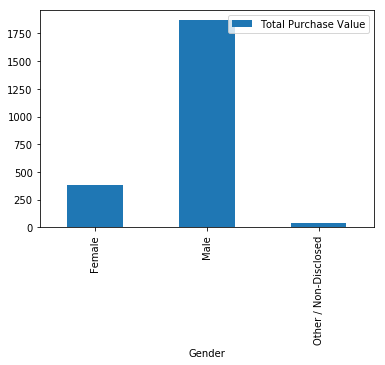

In [18]:
total_price_df.plot.bar()

# Normalized Totals by Gender:

In [17]:
normalized_price_df = total_price_df.assign()
normalized_price_df.iloc[0,0] = normalized_price_df.iloc[0,0] / purchase_count_df.iloc[0,0]
normalized_price_df.iloc[1,0] = normalized_price_df.iloc[1,0] / purchase_count_df.iloc[1,0]
normalized_price_df.iloc[2,0] = normalized_price_df.iloc[2,0] / purchase_count_df.iloc[2,0]
normalized_price_df.rename(index=str, columns={'Total Purchase Value': 'Normalized Purchase Value'}, inplace=True)
normalized_price_df

,Normalized Purchase Value
Gender,
Female,2.815515
Male,2.950521
Other / Non-Disclosed,3.249091


# Age Demographics:

# Purchase Count by Age Group:

In [37]:
print(purchase_data_df['Age'].min())
bin = np.arange(5,55,5)
labels = ['5-10', '10-15', '15-20', '20-25', '25-30', '35-40', '40-45', '45-50','50-55']
purchase_data_df['Age range'] = pd.cut(purchase_data_df['Age'], bin, labels=labels) 
purchase_data_df.sort_values('Age', ascending=True).head(50)


7


,Age,Gender,Item ID,Item Name,Price,SN,Age range
383,7,Male,66,Victor Iron Spikes,3.55,Ingatcil75,5-10
670,7,Male,177,"Winterthorn, Defender of Shifting Worlds",4.89,Ingatcil75,5-10
720,7,Male,82,Nirvana,1.11,Yarithsurgue62,5-10
292,7,Male,121,Massacre,3.42,Lisistaya47,5-10
291,7,Male,53,Vengeance Cleaver,3.70,Yarithsurgue62,5-10
442,7,Male,34,Retribution Axe,4.14,Liri91,5-10
360,7,Female,21,Souleater,3.27,Lisirra55,5-10
121,7,Male,175,Woeful Adamantite Claymore,1.24,Lassjask63,5-10
610,7,Male,158,"Darkheart, Butcher of the Champion",3.56,Lassjask63,5-10
271,7,Male,77,"Piety, Guardian of Riddles",3.68,Frichjaskan98,5-10


In [15]:


purchase_data_df.groupby('SN').sum().sort_values('Price', ascending=False)

,Age,Item ID,Price
SN,,,
Undirrala66,145,472,17.06
Saedue76,100,233,13.56
Mindimnya67,156,609,12.74
Haellysu29,63,353,12.73
Eoda93,66,284,11.58
Isursti83,72,299,11.05
Isurria36,54,390,11.01
Eusri70,90,325,10.55
Aerithllora36,87,281,10.45
